In [1]:
from bs4 import BeautifulSoup
import datetime
import numpy as np
import pandas as pd
import pickle
import re
import requests
import time

In [19]:
def get_max_page(date):

    BASE_URL = 'https://news.naver.com/main/list.naver?mode=LSD&mid=sec&listType=title&'

    last_page = 1000

    while True:
        url = BASE_URL
        url += f'date={date}&'
        url += f'page={last_page}'

        res = requests.get(url)
        bs = BeautifulSoup(res.text)
        time.sleep(1)

        has_next = bs.find('a', class_='next nclicks(fls.page)')
        page_list = bs.find('div', class_='paging')
        
        if not has_next and last_page >= int(page_list.find('strong').get_text()):
            last_page = int(page_list.find('strong').get_text())
            break
        else :
            last_page += 1000


    return last_page

In [55]:
def get_max_page_list(date_start, date_end):
    
    period = pd.date_range(date_start, date_end)
    max_pages = []

    for ts in period:
        date = str(ts.year) + str(ts.month).zfill(2) + str(ts.day).zfill(2)
        max_pages.append(get_max_page(date))
        #print(f'MAX PAGE IN {date} : {max_pages[-1]}')

    return list(zip(period, max_pages))

In [48]:
max_pages = get_max_page_list('20230101', '20231231')

MAX PAGE IN 20240101 : 248
MAX PAGE IN 20240102 : 466
MAX PAGE IN 20240103 : 428
MAX PAGE IN 20240104 : 435
MAX PAGE IN 20240105 : 340
MAX PAGE IN 20240106 : 107
MAX PAGE IN 20240107 : 168
MAX PAGE IN 20240108 : 419
MAX PAGE IN 20240109 : 458
MAX PAGE IN 20240110 : 464
MAX PAGE IN 20240111 : 456
MAX PAGE IN 20240112 : 334
MAX PAGE IN 20240113 : 107
MAX PAGE IN 20240114 : 180
MAX PAGE IN 20240115 : 422
MAX PAGE IN 20240116 : 457
MAX PAGE IN 20240117 : 456
MAX PAGE IN 20240118 : 454
MAX PAGE IN 20240119 : 345
MAX PAGE IN 20240120 : 104
MAX PAGE IN 20240121 : 177
MAX PAGE IN 20240122 : 422
MAX PAGE IN 20240123 : 448
MAX PAGE IN 20240124 : 460
MAX PAGE IN 20240125 : 493
MAX PAGE IN 20240126 : 349
MAX PAGE IN 20240127 : 101
MAX PAGE IN 20240128 : 173
MAX PAGE IN 20240129 : 443
MAX PAGE IN 20240130 : 485
MAX PAGE IN 20240131 : 494
MAX PAGE IN 20240201 : 519
MAX PAGE IN 20240202 : 388
MAX PAGE IN 20240203 : 123
MAX PAGE IN 20240204 : 206
MAX PAGE IN 20240205 : 488
MAX PAGE IN 20240206 : 504
M

In [24]:
period = pd.date_range('20240101', '20240420')
period[0]

Timestamp('2024-01-01 00:00:00')

In [38]:
str(period[0].year) + str(period[0].month).zfill(2) + str(period[0].day).zfill(2)

'20240101'

In [56]:
pd.date_range('20240101', '20240101')

DatetimeIndex(['2024-01-01'], dtype='datetime64[ns]', freq='D')

In [49]:
df = pd.DataFrame(max_pages)
df

,0,1
0,2024-01-01,248
1,2024-01-02,466
2,2024-01-03,428
3,2024-01-04,435
4,2024-01-05,340
...,...,...
111,2024-04-21,184
112,2024-04-22,472
113,2024-04-23,472
114,2024-04-24,470


In [51]:
df[1].mean()

367.9913793103448

In [58]:
df[df[1] == df[1].min()]

,0,1
26,2024-01-27,101


<Axes: >

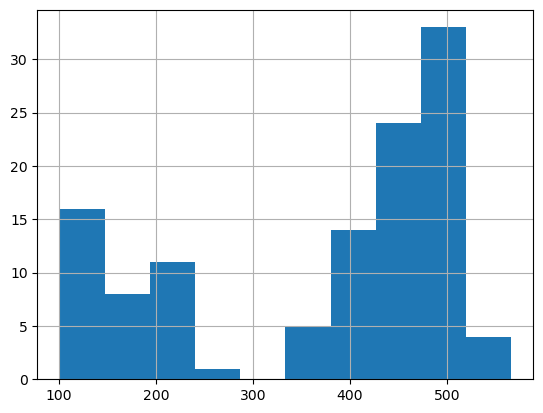

In [54]:
df[1].hist()